In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기
log_df = pd.read_csv("/Users/sepgom/Documents/종합설계/microgrid_log_20250928_1817.csv")
weather_df = pd.read_csv("/Users/sepgom/Documents/종합설계/microgrid_weather_subset.csv")

In [3]:
# 공통 기준 컬럼 확인 (예: 'time' 또는 'datetime')
common_cols = set(log_df.columns) & set(weather_df.columns)
print("공통 컬럼:", common_cols)

공통 컬럼: {'time', 'date'}


In [8]:
# 데이터프레임 병합 (예: 'time' 컬럼 기준)
df = pd.merge(log_df, weather_df, on='time', how='inner')
df.head()

,date_x,time,session,block,load_level,load_w,pv_v,pv_i,pv_w,batt_v,batt_i,batt_w,soc_pct,bus_v,date_y,weather,kma_temp_cur_c,kma_GHI_proxy_Wm2
0,2025-09-22,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-22,Clear/Cloudy,25.6,553.2
1,2025-09-22,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-23,Clear/Cloudy,25.9,536.9
2,2025-09-22,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-24,Rain,23.0,121.0
3,2025-09-22,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-25,Clear/Cloudy,25.2,582.0
4,2025-09-22,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-26,Clear/Cloudy,26.1,537.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_x             5880 non-null   object 
 1   time               5880 non-null   object 
 2   session            5880 non-null   object 
 3   block              5880 non-null   object 
 4   load_level         5880 non-null   object 
 5   load_w             5880 non-null   float64
 6   pv_v               5880 non-null   float64
 7   pv_i               5880 non-null   float64
 8   pv_w               5880 non-null   float64
 9   batt_v             5880 non-null   float64
 10  batt_i             5880 non-null   float64
 11  batt_w             5880 non-null   float64
 12  soc_pct            5880 non-null   float64
 13  bus_v              5880 non-null   float64
 14  date_y             5880 non-null   object 
 15  weather            5880 non-null   object 
 16  kma_temp_cur_c     5880 

In [6]:
df.describe()

,load_w,pv_v,pv_i,pv_w,batt_v,batt_i,batt_w,soc_pct,bus_v,kma_temp_cur_c,kma_GHI_proxy_Wm2
count,5.880000e+03,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000,5880.000000
mean,1.440000e+00,8.907513,0.039179,0.708071,11.747050,0.062821,0.731929,35.329643,11.998220,24.900714,175.912262
std,1.538900e-13,9.037348,0.039792,0.719110,0.203933,0.061731,0.719110,19.022482,0.079554,0.934449,218.242733
min,1.440000e+00,0.000000,0.000000,0.000000,11.522000,0.000000,0.000000,15.000000,11.735000,22.500000,0.000000
25%,1.440000e+00,0.000000,0.000000,0.000000,11.581000,0.000000,0.000000,15.000000,11.944000,24.300000,0.000000
50%,1.440000e+00,0.000000,0.000000,0.000000,11.676000,0.119000,1.440000,33.005000,11.995000,24.900000,18.250000
75%,1.440000e+00,18.065000,0.080000,1.440000,11.891000,0.124000,1.440000,50.000000,12.055000,25.600000,343.825000
max,1.440000e+00,18.640000,0.082000,1.440000,12.211000,0.125000,1.440000,70.000000,12.234000,27.100000,606.300000


### 1. EDA 및 전처리

In [10]:
# date + time → datetime으로 통합 및 인덱스 설정
df['datetime'] = pd.to_datetime(df['date_x'] + " " + df['time'])
df.insert(0, 'datetime', df.pop('datetime'))
df.drop(columns=['date_x'], inplace=True)
df.head()

,datetime,time,session,block,load_level,load_w,pv_v,pv_i,pv_w,batt_v,batt_i,batt_w,soc_pct,bus_v,date_y,weather,kma_temp_cur_c,kma_GHI_proxy_Wm2
0,2025-09-22 12:00:00,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-22,Clear/Cloudy,25.6,553.2
1,2025-09-22 12:00:00,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-23,Clear/Cloudy,25.9,536.9
2,2025-09-22 12:00:00,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-24,Rain,23.0,121.0
3,2025-09-22 12:00:00,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-25,Clear/Cloudy,25.2,582.0
4,2025-09-22 12:00:00,12:00:00,12h,PV,Low,1.44,18.243,0.079,1.44,12.18,0.0,0.0,70.0,11.937,2025-09-26,Clear/Cloudy,26.1,537.9


In [11]:
# 시간대 분리
df_12 = df[df['session'] == "12h"]
df_17 = df[df['session'] == "17h"]

print("12시 세션 데이터 수:", len(df_12))
print("17시 세션 데이터 수:", len(df_17))

12시 세션 데이터 수: 2940
17시 세션 데이터 수: 2940


### 2. 그래프 도출 및 분석

In [12]:
from matplotlib import font_manager, rc

# Korean font 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) 

In [13]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# 날짜 포맷 지정 (예: '09-28' 형식)
date_format = DateFormatter("%m-%d")

#### 2.1 버스 전압 안정성 비교

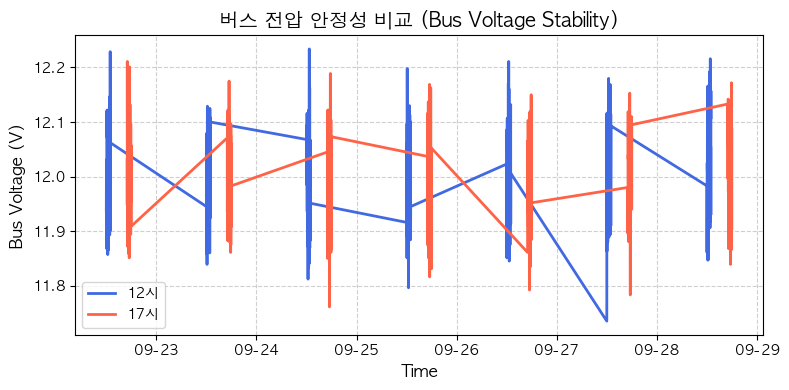

In [14]:
# 버스 전압 안정성 비교 그래프
plt.figure(figsize=(8,4))
plt.plot(df_12['datetime'], df_12['bus_v'], label='12시', color='royalblue', linewidth=2)
plt.plot(df_17['datetime'], df_17['bus_v'], label='17시', color='tomato', linewidth=2)

plt.title("버스 전압 안정성 비교 (Bus Voltage Stability)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Bus Voltage (V)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)

plt.tight_layout()
plt.show()

In [15]:
# 전압 안정성 수치 분석
mean_12 = df_12['bus_v'].mean()
std_12 = df_12['bus_v'].std()
mean_17 = df_17['bus_v'].mean()
std_17 = df_17['bus_v'].std()

print(f"12시 세션 평균 전압: {mean_12:.3f} V, 표준편차: {std_12:.4f}")
print(f"17시 세션 평균 전압: {mean_17:.3f} V, 표준편차: {std_17:.4f}")

12시 세션 평균 전압: 11.998 V, 표준편차: 0.0821
17시 세션 평균 전압: 11.999 V, 표준편차: 0.0769


#### 2.2 시간대별 부하 대응성 확인

In [16]:
# 공급 전력(PV + 배터리) 계산
df['supply_w'] = df['pv_w'] + df['batt_w']

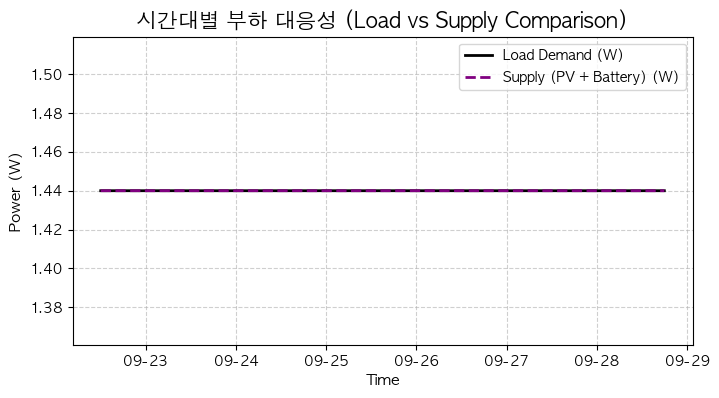

In [17]:
plt.figure(figsize=(8,4))

plt.plot(df['datetime'], df['load_w'], label='Load Demand (W)', color='black', linewidth=2)
plt.plot(df['datetime'], df['supply_w'], label='Supply (PV + Battery) (W)', color='purple', linestyle='--', linewidth=2)
plt.xlabel("Time", fontsize=11)
plt.ylabel("Power (W)", fontsize=11)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)

plt.title("시간대별 부하 대응성 (Load vs Supply Comparison)", fontsize=15)
plt.show()

#### 2.3 태양광 패널 전압 & 전류 그래프

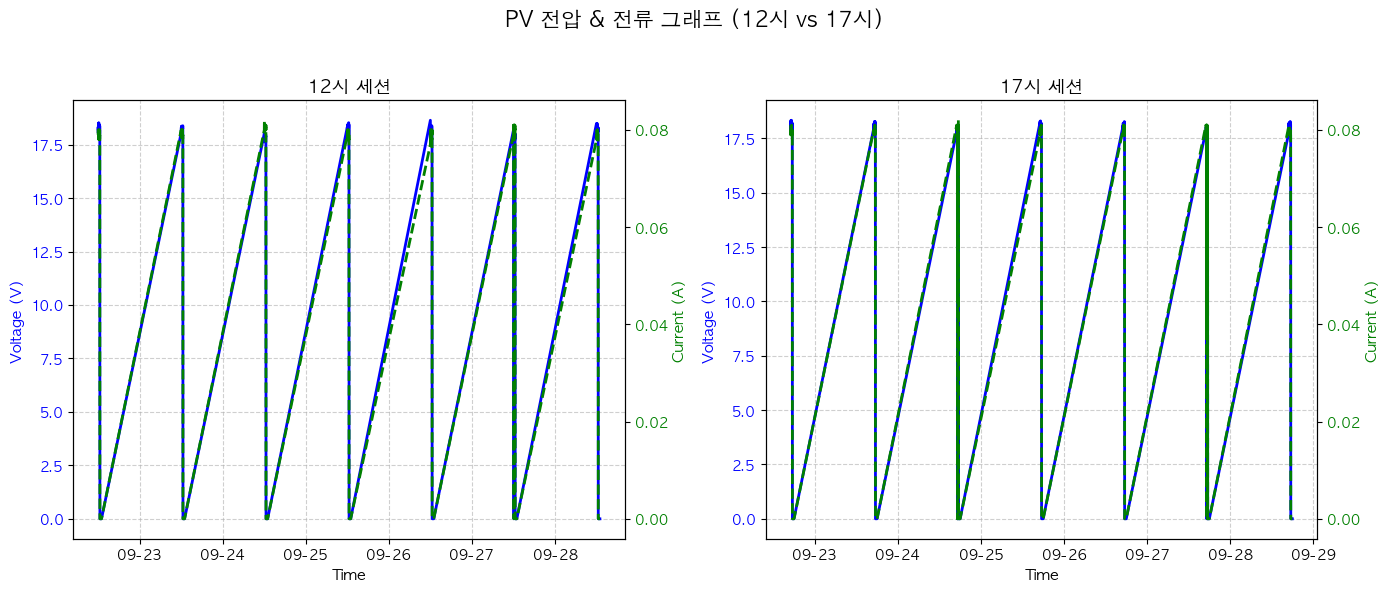

In [18]:
### PV 전압 & 전류 그래프
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

## 12시 세션
# 첫 번째 y축 (전압)
ax1 = axes[0]
ax1.plot(df_12['datetime'], df_12['pv_v'], color='blue', linewidth=2, label='Voltage (V)')
ax1.set_xlabel("Time", fontsize=11)
ax1.set_ylabel("Voltage (V)", color='blue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# 두 번째 y축 (전류)
ax1b = ax1.twinx()
ax1b.plot(df_12['datetime'], df_12['pv_i'], color='green', linewidth=2, linestyle='--', label='Current (A)')
ax1b.set_ylabel("Current (A)", color='green', fontsize=11)
ax1b.tick_params(axis='y', labelcolor='green')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_title("12시 세션", fontsize=13)

## 17시 세션
# 첫 번째 y축 (전압)
ax2 = axes[1]
ax2.plot(df_17['datetime'], df_17['pv_v'], color='blue', linewidth=2, label='Voltage (V)')
ax2.set_xlabel("Time", fontsize=11)
ax2.set_ylabel("Voltage (V)", color='blue', fontsize=11)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, linestyle='--', alpha=0.6)

# 두 번째 y축 (전류)
ax2b = ax2.twinx()
ax2b.plot(df_17['datetime'], df_17['pv_i'], color='green', linewidth=2, linestyle='--', label='Current (A)')
ax2b.set_ylabel("Current (A)", color='green', fontsize=11)
ax2b.tick_params(axis='y', labelcolor='green')
ax2.xaxis.set_major_formatter(date_format)
ax2.set_title("17시 세션", fontsize=13)

fig.suptitle("PV 전압 & 전류 그래프 (12시 vs 17시)", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.4 배터리 전압 & 전류 그래프

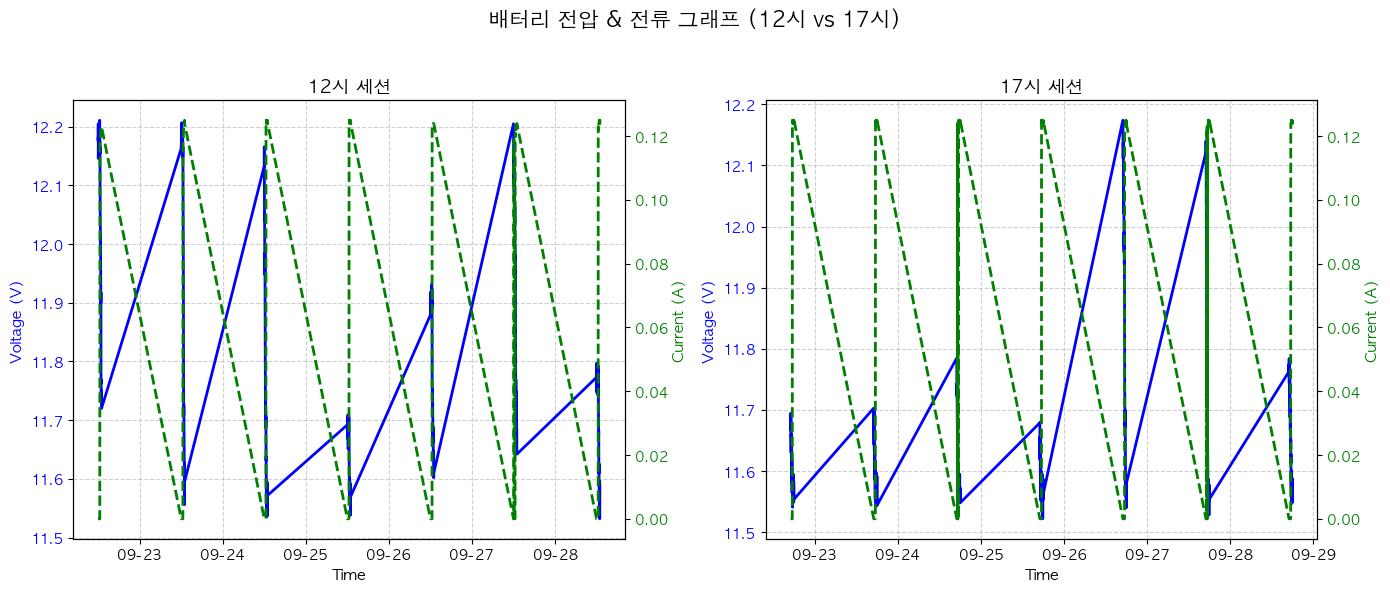

In [19]:
### 배터리 전압 & 전류 그래프
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

## 12시 세션
# 첫 번째 y축 (전압)
ax1 = axes[0]
ax1.plot(df_12['datetime'], df_12['batt_v'], color='blue', linewidth=2, label='Voltage (V)')
ax1.set_xlabel("Time", fontsize=11)
ax1.set_ylabel("Voltage (V)", color='blue', fontsize=11)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# 두 번째 y축 (전류)
ax1b = ax1.twinx()
ax1b.plot(df_12['datetime'], df_12['batt_i'], color='green', linewidth=2, linestyle='--', label='Current (A)')
ax1b.set_ylabel("Current (A)", color='green', fontsize=11)
ax1b.tick_params(axis='y', labelcolor='green')
ax1.xaxis.set_major_formatter(date_format)

ax1.set_title("12시 세션", fontsize=13)

## 17시 세션
# 첫 번째 y축 (전압)
ax2 = axes[1]
ax2.plot(df_17['datetime'], df_17['batt_v'], color='blue', linewidth=2, label='Voltage (V)')
ax2.set_xlabel("Time", fontsize=11)
ax2.set_ylabel("Voltage (V)", color='blue', fontsize=11)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, linestyle='--', alpha=0.6)

# 두 번째 y축 (전류)
ax2b = ax2.twinx()
ax2b.plot(df_17['datetime'], df_17['batt_i'], color='green', linewidth=2, linestyle='--', label='Current (A)')
ax2b.set_ylabel("Current (A)", color='green', fontsize=11)
ax2b.tick_params(axis='y', labelcolor='green')
ax2.xaxis.set_major_formatter(date_format)

ax2.set_title("17시 세션", fontsize=13)

fig.suptitle("배터리 전압 & 전류 그래프 (12시 vs 17시)", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()